In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
from shapely.geometry import Point , LineString , Polygon , MultiPoint

# 1.构造GeoDataFrame对象：

In [3]:
x = np.random.randn(10)
y = np.random.randn(10)

In [4]:
points = [Point(i) for i in list(zip(x,y))]
points

[<POINT (-1.03 -0.757)>,
 <POINT (-0.689 -0.029)>,
 <POINT (1.281 0.66)>,
 <POINT (-1.088 0.376)>,
 <POINT (0.775 -0.006)>,
 <POINT (0.739 -1.015)>,
 <POINT (1.585 -1.275)>,
 <POINT (1.664 0.013)>,
 <POINT (-1.088 -0.515)>,
 <POINT (2.181 0.831)>]

In [5]:
gdf = gpd.GeoDataFrame({'num':range(1,len(points)+1) , 'col':points})
gdf

,num,col
0,1,POINT (-1.030072004701957 -0.7574125911110734)
1,2,POINT (-0.6887053116268416 -0.0289018317965451)
2,3,POINT (1.2813645374485234 0.6603135962418688)
3,4,POINT (-1.0882149113137465 0.3761351602073085)
4,5,POINT (0.774852764999058 -0.00587287563018)
5,6,POINT (0.7394129081437799 -1.0146124986707379)
6,7,POINT (1.584785820983726 -1.2753555252824338)
7,8,POINT (1.6636517317255455 0.0130718115794348)
8,9,POINT (-1.087761835664689 -0.515202911014124)
9,10,POINT (2.1806236531569883 0.8307539880982108)


In [6]:
# 访问“geometry”列——会报错
gdf.geometry

AttributeError: You are calling a geospatial method on the GeoDataFrame, but the active geometry column ('geometry') is not present. 
There are no existing columns with geometry data type. You can add a geometry column as the active geometry column with df.set_geometry. 

In [7]:
# 设置那一列是“geometry”列
gdf = gdf.set_geometry('col')
gdf

,num,col
0,1,POINT (-1.03007 -0.75741)
1,2,POINT (-0.68871 -0.02890)
2,3,POINT (1.28136 0.66031)
3,4,POINT (-1.08821 0.37614)
4,5,POINT (0.77485 -0.00587)
5,6,POINT (0.73941 -1.01461)
6,7,POINT (1.58479 -1.27536)
7,8,POINT (1.66365 0.01307)
8,9,POINT (-1.08776 -0.51520)
9,10,POINT (2.18062 0.83075)


In [8]:
# 获取geometry列
gdf.geometry

0    POINT (-1.03007 -0.75741)
1    POINT (-0.68871 -0.02890)
2      POINT (1.28136 0.66031)
3     POINT (-1.08821 0.37614)
4     POINT (0.77485 -0.00587)
5     POINT (0.73941 -1.01461)
6     POINT (1.58479 -1.27536)
7      POINT (1.66365 0.01307)
8    POINT (-1.08776 -0.51520)
9      POINT (2.18062 0.83075)
Name: col, dtype: geometry

In [9]:
# 获取geometry列的名称
gdf.geometry.name

'col'

In [10]:
# 获取几何对象的类型
gdf.geom_type

0    Point
1    Point
2    Point
3    Point
4    Point
5    Point
6    Point
7    Point
8    Point
9    Point
dtype: object

<AxesSubplot:>

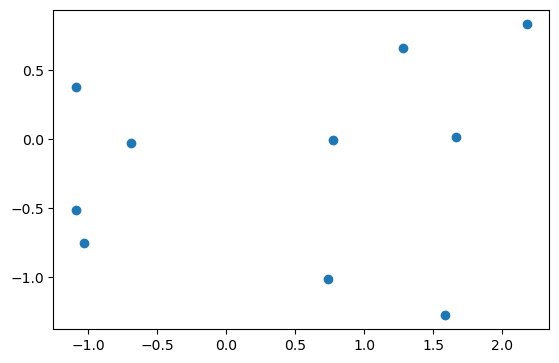

In [11]:
gdf.plot()

In [12]:
gdf2 = gpd.GeoDataFrame({'num':range(1,len(points)+1) , 'geometry':points})
gdf2

,num,geometry
0,1,POINT (-1.03007 -0.75741)
1,2,POINT (-0.68871 -0.02890)
2,3,POINT (1.28136 0.66031)
3,4,POINT (-1.08821 0.37614)
4,5,POINT (0.77485 -0.00587)
5,6,POINT (0.73941 -1.01461)
6,7,POINT (1.58479 -1.27536)
7,8,POINT (1.66365 0.01307)
8,9,POINT (-1.08776 -0.51520)
9,10,POINT (2.18062 0.83075)


In [13]:
gdf2.geometry.name

'geometry'

# 2.示例：

In [14]:
# 读取数据，并显示前5行
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world.head()

PROJ: proj_create_from_database: D:\Anaconda\Library/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

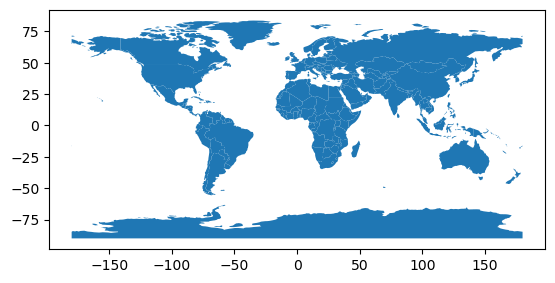

In [15]:
# 绘图
world.plot()

### 目前，带有国家边界的名为“geometry”的列是活动几何列。

In [16]:
world.geometry.name

'geometry'

### 我们也可以将这一列重命名为“borders”。

In [17]:
world = world.rename(columns={'geometry':'borders'}).set_geometry('borders')

In [18]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,borders
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [19]:
world.geometry.name

'borders'

### 现在，我们创建质心并将其设置为活动几何列

In [20]:
world['centroid_column'] = world.centroid

In [21]:
world = world.set_geometry('centroid_column')

<AxesSubplot:>

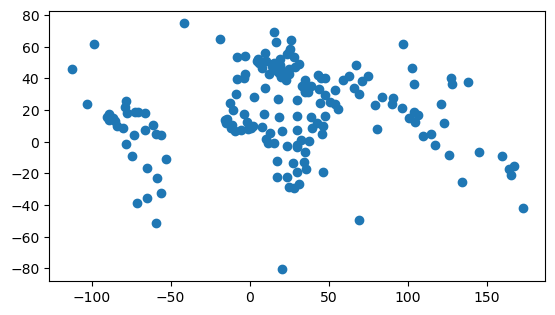

In [22]:
world.plot()

# 3.Display options

In [23]:
gpd.options

Options(
  display_precision: None [default: None]
      The precision (maximum number of decimals) of the coordinates in the
      WKT representation in the Series/DataFrame display. By default (None),
      it tries to infer and use 3 decimals for projected coordinates and 5
      decimals for geographic coordinates.
  use_pygeos: False [default: False]
      Whether to use PyGEOS to speed up spatial operations. The default is
      True if PyGEOS is installed, and follows the USE_PYGEOS environment
      variable if set.
  )

### geopandas.options.display_precision 选项可以控制在几何列的坐标显示中显示的小数位数。在上面的world示例中，默认情况下地理坐标显示 5 位小数。

In [24]:
world['centroid_column'].head()

0    POINT (163.85316 -17.31631)
1      POINT (34.75299 -6.25773)
2     POINT (-12.13783 24.29117)
3     POINT (-98.14238 61.46908)
4    POINT (-112.59944 45.70563)
Name: centroid_column, dtype: geometry

### 如果你想改变这一点，例如想看到更多的小数，你可以这样做。

In [25]:
gpd.options.display_precision = 9

In [26]:
world['centroid_column'].head()

0    POINT (163.853164645 -17.316309426)
1      POINT (34.752989855 -6.257732429)
2     POINT (-12.137831112 24.291172960)
3     POINT (-98.142381372 61.469076145)
4    POINT (-112.599435912 45.705628002)
Name: centroid_column, dtype: geometry